In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

In [7]:
# reflect the tables
Base.prepare(engine, reflect = True)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table

station_list = Base.classes.station

measurement_list = Base.classes.measurement

In [10]:
inspect(engine).get_table_names()

['measurement', 'station']

In [12]:
inspect(engine).get_columns("measurement")

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [13]:
inspect(engine).get_columns("station")

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'latitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'longitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'elevation',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [9]:
# https://stackoverflow.com/questions/21310549/list-database-tables-with-sqlalchemy

from sqlalchemy import MetaData
m = MetaData()
m.reflect(engine)
for table in m.tables.values():
    print(table.name)
    for column in table.c:
        print(column.name)

measurement
id
station
date
prcp
tobs
station
id
station
name
latitude
longitude
elevation


In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
# I installed SQLite Viewer on my Visual Studio Code to view the tables and columns because
# I didn't care for MetaData version. I just kept it for copy/paste

recent_date = session.query(measurement_list.date).order_by(measurement_list.date.desc()).first()
recent_date

('2017-08-23',)

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

one_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# one_year

# Perform a query to retrieve the data and precipitation scores
prcp_score = session.query(measurement_list.date, measurement_list.prcp).filter(measurement_list.date > one_year).order_by(measurement_list.date).all()
# prcp_score

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_score_df = pd.DataFrame(prcp_score, columns=['date', 'prcp']).dropna()
prcp_score_df.set_index("date", inplace = True)
# prcp_score_df.head()

# Sort the dataframe by date
prcp_score_df.sort_values(by='date', ascending=True)
prcp_score_df.head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,1.22
2016-08-24,2.15


ValueError: The number of FixedLocator locations (11), usually from a call to set_ticks, does not match the number of ticklabels (2015).

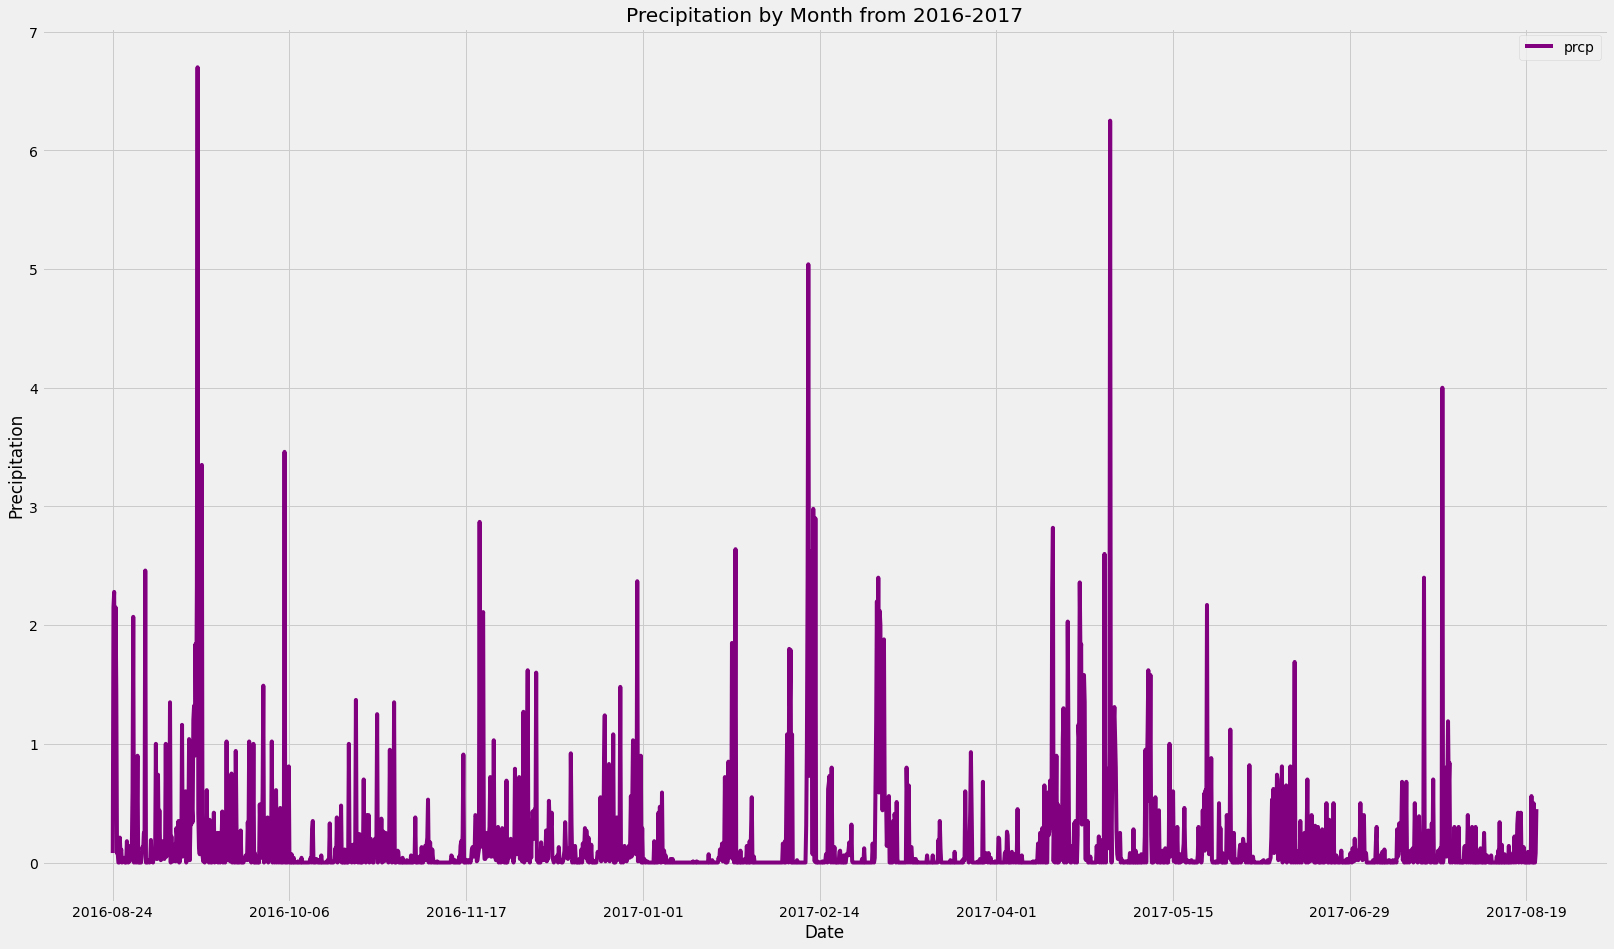

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data

# prcp_score_df.plot(x= 'date', y= 'prcp', rot=90, figsize= (15,5), facecolor="red")
# plt.xlabel('Date', fontsize = 17)
# plt.xticks(rotation = 90, fontsize = 17)
# plt.ylabel('Precipitation', fontsize = 20)
# plt.yticks(fontsize = 20)
# plt.show()


# Configure plot, figsize, title, and axis labels
prcp_score_fig = prcp_score_df.plot(color=["purple"], figsize=(25,15),
                                   title="Precipitation by Month from 2016-2017",
                                   xlabel="Date",
                                   ylabel="Precipitation")

# Configure x-tick rotation
xticklabels = prcp_score_df.index
prcp_score_fig.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)

# Show plot
plt.show()

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
import scipy.stats as st

# Demonstrate calculating measures of central tendency
prcp_mean = np.mean(prcp_score_df["prcp"])
print(f"The mean precipitation between dates 08/24/2016 and 08/23/2017 was {prcp_mean}")

prcp_median = np.median(prcp_score_df["prcp"])
print(f"The median precipitation between dates 08/24/2016 and 08/23/2017 was {prcp_median}")

prcp_mode = st.mode(prcp_score_df["prcp"])
print(f"The mode precipitation between dates 08/24/2016 and 08/23/2017 was {prcp_mode}")

# Demonstrate calculating the variance and standard deviation using the different modules
prcp_var = np.var(prcp_score_df["prcp"],ddof = 0)
print(f"The precipitation variance using the NumPy module is {prcp_var}")

prcp_sd = np.std(prcp_score_df["prcp"],ddof = 0)
print(f"The precipitation standard deviation using the NumPy module is {prcp_sd}")

# Calculate the 68-95-99.7 rule using the standard deviation
print(f"Roughly 68% of the data is between {round(prcp_mean-prcp_sd,3)} and {round(prcp_mean+prcp_sd,3)}")
print(f"Roughly 95% of the data is between {round(prcp_mean-2*prcp_sd,3)} and {round(prcp_mean+2*prcp_sd,3)}")
print(f"Roughly 99.7% of the data is between {round(prcp_mean-3*prcp_sd,3)} and {round(prcp_mean+3*prcp_sd,3)}")

# Demonstrate calculating the z-scores using SciPy
z_scipy = st.zscore(prcp_score_df["prcp"])
print(f"The z-scores using the SciPy module are {z_scipy}")

The mean precipitation between dates 08/24/2016 and 08/23/2017 was 0.1764615384615378
The median precipitation between dates 08/24/2016 and 08/23/2017 was 0.02
The mode precipitation between dates 08/24/2016 and 08/23/2017 was ModeResult(mode=array([0.]), count=array([873]))
The precipitation variance using the NumPy module is 0.21176023363236776
The precipitation standard deviation using the NumPy module is 0.46017413403228974
Roughly 68% of the data is between -0.284 and 0.637
Roughly 95% of the data is between -0.744 and 1.097
Roughly 99.7% of the data is between -1.204 and 1.557
The z-scores using the SciPy module are date
2016-08-24   -0.209620
2016-08-24    4.288678
2016-08-24    4.571179
2016-08-24    2.267703
2016-08-24    4.288678
                ...   
2017-08-22    0.703078
2017-08-23   -0.383467
2017-08-23   -0.383467
2017-08-23   -0.209620
2017-08-23    0.594424
Name: prcp, Length: 2015, dtype: float64


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number stations in the dataset

# from earlier code
# station_list = Base.classes.station


station_query = session.query(station_list)


all_station = station_query.count()
all_station

9

In [16]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

# from earlier code
# measurement_list = Base.classes.measurement


measurement_query = session.query(measurement_list)


pop_station = session.query(measurement_list.station, func.count(measurement_list.station))\
.group_by(measurement_list.station).order_by(func.count(measurement_list.station).desc()).all()

print(pop_station[0])

('USC00519281', 2772)


In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

pop_station2 = session.query(func.min(measurement_list.tobs), func.avg(measurement_list.tobs), func.max(measurement_list.tobs)).filter(measurement_list.station == 'USC00519281').all()

print("USC00519281")
print(pop_station2)

USC00519281
[(54.0, 71.66378066378067, 85.0)]


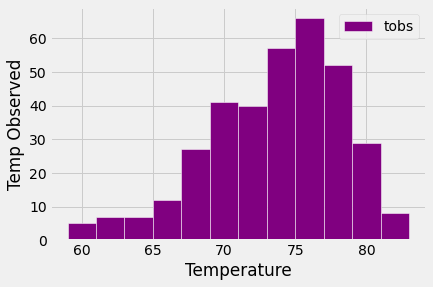

In [29]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp_obsv = session.query(measurement_list.tobs).filter(measurement_list.date > one_year).filter(measurement_list.station == 'USC00519281').all()
temp_obsv_df = pd.DataFrame(temp_obsv, columns = ['tobs'])
temp_obsv_df.plot.hist(bins = 12, color=["purple"], edgecolor="white")
plt.xlabel('Temperature')
plt.ylabel('Temp Observed')
plt.show()


# Close session

In [30]:
# Close Session
session.close()